In [43]:
import pathlib
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [53]:
validation_path = pathlib.Path("/work/scratch-nopw2/wkjones/validation_v1.8/")
files = sorted(list(validation_path.glob("validation_dccs_S2018*_120000_E*_120000_X0000_2500_Y0000_1500.nc")))
print(len(files))

321


In [54]:
flash2core = []
flash2anvil = []
flash2core_with_anvil = []
flash2anvil_with_core = []
core2flash = []
anvil2flash = []
core_with_anvil2flash = []
anvil_with_core2flash = []

for f in files:
    print(f, end='\r')
    
    with xr.open_dataset(f) as ds:
        flash2core.append(ds.flash_core_distance.data)
        flash2anvil.append(ds.flash_anvil_distance.data)
        core2flash.append(ds.core_glm_distance.data[ds.core_margin_flag.data])
        anvil2flash.append(ds.anvil_glm_distance.data[ds.anvil_margin_flag.data])
        flash2core_with_anvil.append(ds.flash_core_with_anvil_distance.data)
        flash2anvil_with_core.append(ds.flash_anvil_with_core_distance.data)
        core_with_anvil2flash.append(ds.core_with_anvil_glm_distance.data[ds.core_with_anvil_margin_flag.data])
        anvil_with_core2flash.append(ds.anvil_with_core_glm_distance.data[ds.anvil_with_core_margin_flag.data])

flash2core = np.concatenate(flash2core)
flash2anvil = np.concatenate(flash2anvil)
core2flash = np.concatenate(core2flash)
anvil2flash = np.concatenate(anvil2flash)
flash2core_with_anvil = np.concatenate(flash2core_with_anvil)
flash2anvil_with_core = np.concatenate(flash2anvil_with_core)
core_with_anvil2flash = np.concatenate(core_with_anvil2flash)
anvil_with_core2flash = np.concatenate(anvil_with_core2flash)

# flash2core = flash2core[np.isfinite(flash2core)]
# flash2anvil = flash2anvil[np.isfinite(flash2anvil)]
# core2flash = core2flash[np.isfinite(core2flash)]
# anvil2flash = anvil2flash[np.isfinite(anvil2flash)]
# flash2core_with_anvil = flash2core_with_anvil[np.isfinite(flash2core_with_anvil)]
# flash2anvil_with_core = flash2anvil_with_core[np.isfinite(flash2anvil_with_core)]
# core_with_anvil2flash = core_with_anvil2flash[np.isfinite(core_with_anvil2flash)]
# anvil_with_core2flash = anvil_with_core2flash[np.isfinite(anvil_with_core2flash)]

n_glm = flash2core.size
n_core = core2flash.size
n_anvil = anvil2flash.size
n_core_with_anvil = core_with_anvil2flash.size
n_anvil_with_core = anvil_with_core2flash.size


In [55]:
core_with_anvil2flash

array([  0.     , 441.4397 ,  69.89278, ...,       inf,       inf,
             inf], dtype=float32)

In [56]:
# print(n_glm, n_core, n_wvd, n_anvil)
print(n_glm, n_core, n_core_with_anvil, n_anvil, n_anvil_with_core)

117435501 1527754 1173053 128402 111835


In [57]:
core_pod = np.sum(flash2core<=10)/flash2core.size
core_with_anvil_pod = np.sum(flash2core_with_anvil<=10)/flash2core_with_anvil.size
anvil_pod = np.sum(flash2anvil<=10)/flash2anvil.size
anvil_with_core_pod = np.sum(flash2anvil_with_core<=10)/flash2anvil_with_core.size
print("core pod:", np.round(core_pod,4), 
      "core + anvil pod:", np.round(core_with_anvil_pod,4), 
      "anvil pod:", np.round(anvil_pod,4),
      "anvil + core pod:", np.round(anvil_with_core_pod,4),)

core_far = np.sum(core2flash>10)/n_core
anvil_far = np.sum(anvil2flash>10)/n_anvil
core_with_anvil_far = np.sum(core_with_anvil2flash>10)/n_core_with_anvil
anvil_with_core_far = np.sum(anvil_with_core2flash>10)/n_anvil_with_core

print("core far:", np.round(core_far,4), 
      "core + anvil far:", np.round(core_with_anvil_far,4), 
      "anvil far", np.round(anvil_far,4), 
      "anvil + core far", np.round(anvil_with_core_far,4), )

core_f1 = 2*core_pod*(1-core_far)/(core_pod+1-core_far)
anvil_f1 = 2*anvil_pod*(1-anvil_far)/(anvil_pod+1-anvil_far)
core_with_anvil_f1 = 2*core_with_anvil_pod*(1-core_with_anvil_far)/(core_with_anvil_pod+1-core_with_anvil_far)
anvil_with_core_f1 = 2*anvil_with_core_pod*(1-anvil_with_core_far)/(anvil_with_core_pod+1-anvil_with_core_far)

print("core f1:", np.round(core_f1,4), 
      "core + anvil f1:", np.round(core_with_anvil_f1,4), 
      "anvil f1:", np.round(anvil_f1,4),
      "anvil + core f1:", np.round(anvil_with_core_f1,4))

core pod: 0.6036 core + anvil pod: 0.595 anvil pod: 0.9884 anvil + core pod: 0.988
core far: 0.453 core + anvil far: 0.409 anvil far 0.2363 anvil + core far 0.202
core f1: 0.5739 core + anvil f1: 0.593 anvil f1: 0.8616 anvil + core f1: 0.8829


In [58]:
flash2core.size, flash2anvil.size, flash2core_with_anvil.size, flash2anvil_with_core.size

(117435501, 117435501, 117435501, 117435501)

In [59]:
validation_ds = xr.Dataset(
    data_vars=dict(
        flash_core_distance=(('flash',), flash2core), 
        flash_anvil_distance=(('flash',), flash2anvil), 
        flash_core_with_anvil_distance=(('flash',), flash2core_with_anvil), 
        flash_anvil_with_core_distance=(('flash',), flash2anvil_with_core), 
        core_flash_distance=(('core',), core2flash), 
        anvil_flash_distance=(('anvil',), anvil2flash), 
        core_with_anvil_flash_distance=(('core_with_anvil',), core_with_anvil2flash), 
        anvil_with_core_flash_distance=(('anvil_with_core',), anvil_with_core2flash), 
        core_pod=(tuple(), core_pod), 
        anvil_pod=(tuple(), anvil_pod), 
        core_with_anvil_pod=(tuple(), core_with_anvil_pod), 
        anvil_with_core_pod=(tuple(), anvil_with_core_pod), 
        core_far=(tuple(), core_far), 
        anvil_far=(tuple(), anvil_far), 
        core_with_anvil_far=(tuple(), core_with_anvil_far), 
        anvil_with_core_far=(tuple(), anvil_with_core_far), 
        core_f1=(tuple(), core_f1), 
        anvil_f1=(tuple(), anvil_f1), 
        core_with_anvil_f1=(tuple(), core_with_anvil_f1), 
        anvil_with_core_f1=(tuple(), anvil_with_core_f1), 
        n_glm=(tuple(), n_glm), 
        n_core=(tuple(), n_core), 
        n_anvil=(tuple(), n_anvil), 
        n_core_with_anvil=(tuple(), n_core_with_anvil), 
        n_anvil_with_core=(tuple(), n_anvil_with_core), 
        )
    )
# validation_ds.to_netcdf('./data/validation_data.nc')

In [60]:
core_pod_hist = np.histogram(validation_ds.flash_core_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
anvil_pod_hist = np.histogram(validation_ds.flash_anvil_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
core_with_anvil_pod_hist = np.histogram(validation_ds.flash_core_with_anvil_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
anvil_with_core_pod_hist = np.histogram(validation_ds.flash_anvil_with_core_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data

core_far_hist = np.histogram(validation_ds.core_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_core.data
anvil_far_hist = np.histogram(validation_ds.anvil_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_anvil.data
core_with_anvil_far_hist = np.histogram(validation_ds.core_with_anvil_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_core_with_anvil.data
anvil_with_core_far_hist = np.histogram(validation_ds.anvil_with_core_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_anvil_with_core.data


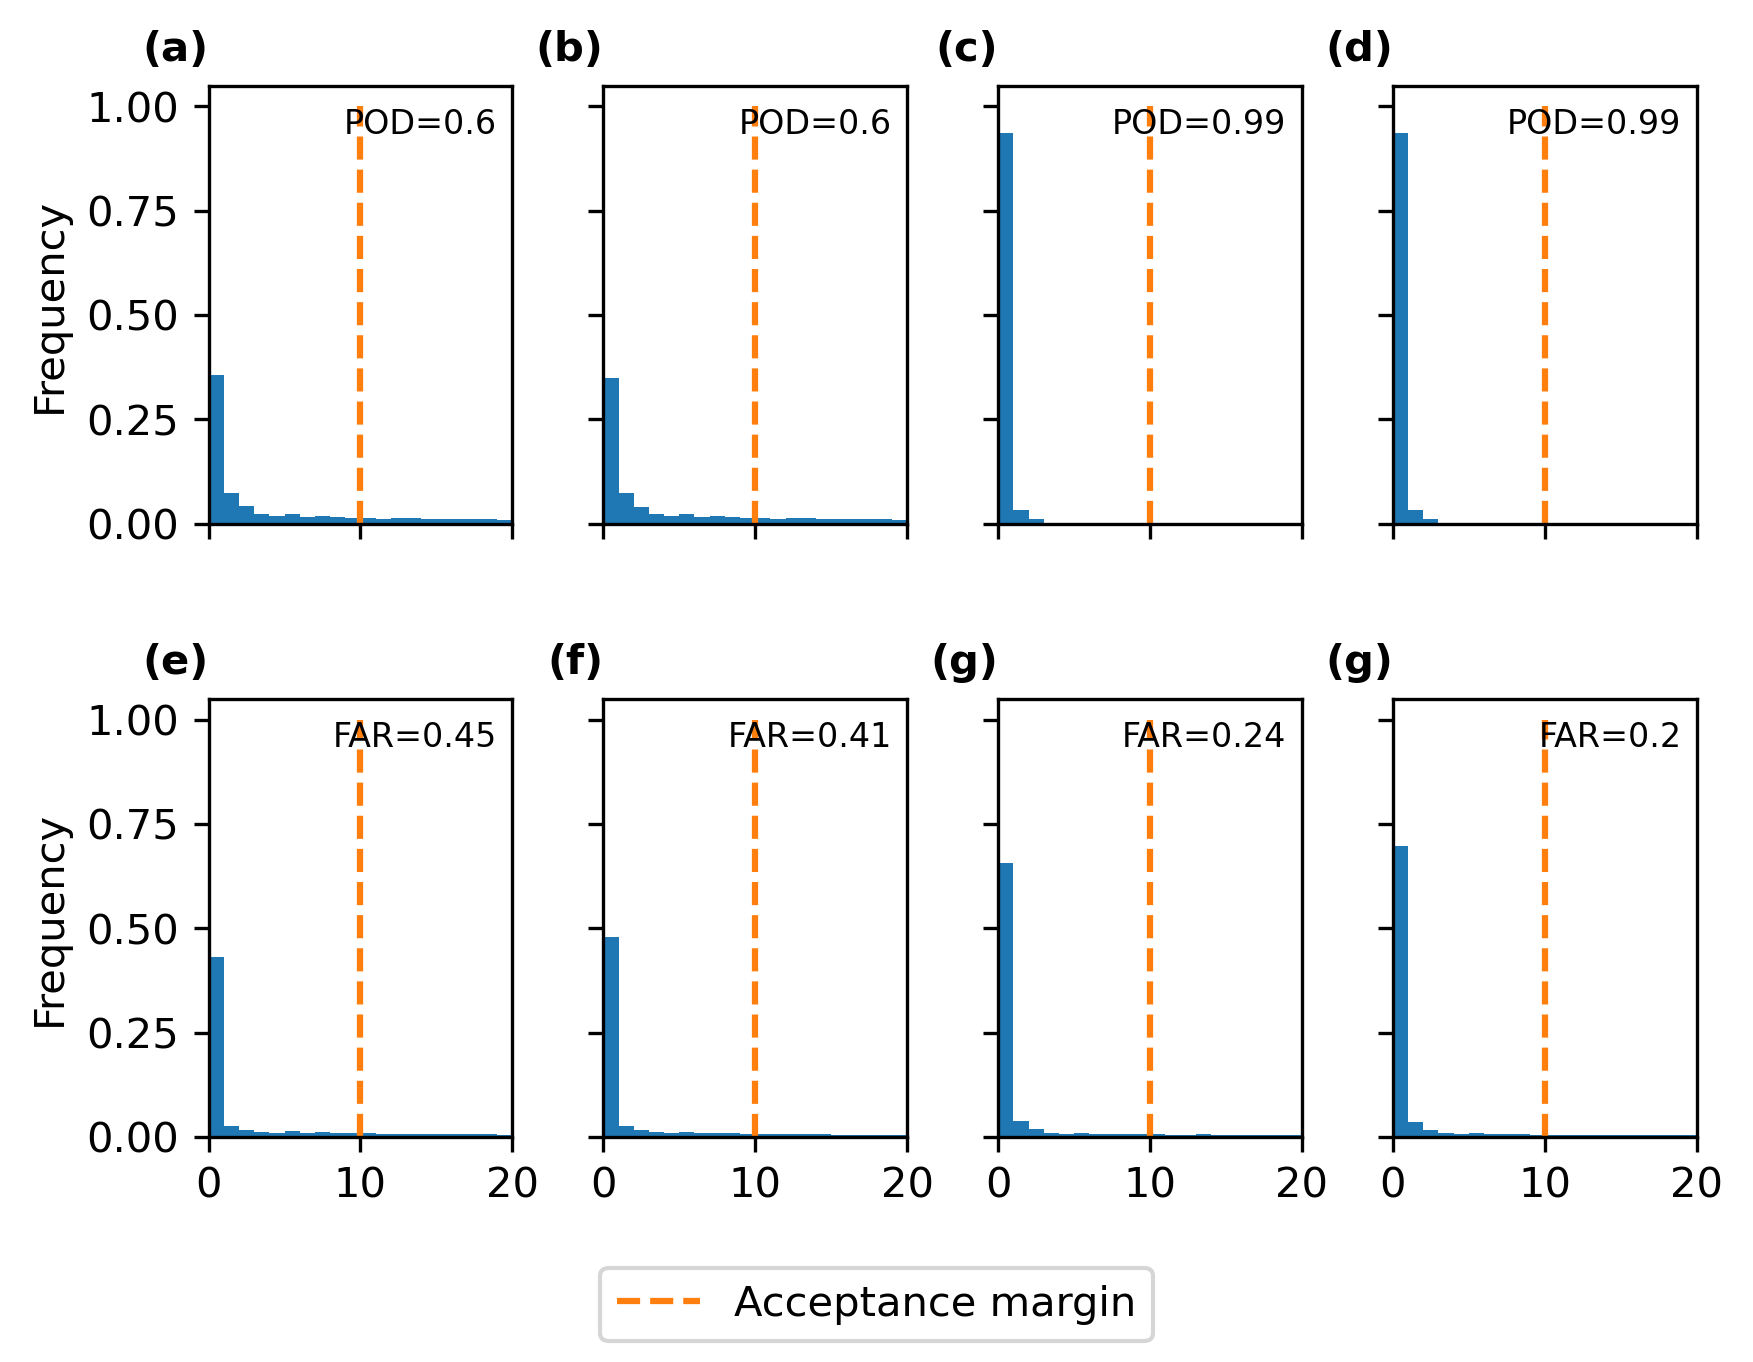

In [61]:
acceptance_margin = 10
xlim = [0,20]
ylim = [0,1.05]

fig, ax = plt.subplots(2, 4, dpi=300, sharex=True, sharey=True)

ax[0,0].bar(np.arange(0,40), core_pod_hist, width=1, align='edge')
ax[0,0].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,0].set_title('(a)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_ylim(ylim)
ax[0,0].set_xlim(xlim)
ax[0,0].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.core_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,1].bar(np.arange(0,40), core_with_anvil_pod_hist, width=1, align='edge')
ax[0,1].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,1].set_title('(b)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,1].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.core_with_anvil_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,2].bar(np.arange(0,40), anvil_pod_hist, width=1, align='edge')
ax[0,2].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,2].set_title('(c)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,2].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.anvil_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,3].bar(np.arange(0,40), anvil_with_core_pod_hist, width=1, align='edge')
ax[0,3].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,3].set_title('(d)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,3].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.anvil_with_core_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[1,0].bar(np.arange(0,40), core_far_hist, width=1, align='edge')
ax[1,0].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,0].set_title('(e)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,0].set_ylabel('Frequency')
ax[1,0].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.core_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,1].bar(np.arange(0,40), core_with_anvil_far_hist, width=1, align='edge')
ax[1,1].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,1].set_title('(f)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,1].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.core_with_anvil_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,2].bar(np.arange(0,40), anvil_far_hist, width=1, align='edge')
ax[1,2].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,2].set_title('(g)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,2].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.anvil_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,3].bar(np.arange(0,40), anvil_with_core_far_hist, width=1, align='edge')
ax[1,3].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,3].set_title('(g)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,3].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.anvil_with_core_far.data,2)}', ha='right', va='top',fontsize=8)

import matplotlib.lines as mlines
fig.legend([mlines.Line2D([], [], color='C01', linestyle='--')], 
           ['Acceptance margin'], loc='lower center')

# fig.text(0.235, 0.95, 'Core only', ha='center', va='baseline')
# fig.text(0.515, 0.95, 'Anvil only', ha='center', va='baseline')
# fig.text(0.785, 0.95, 'Core and Anvil', ha='center', va='baseline')


plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.15)


